# Lab 4. Exploring discrete data

### Intro and objectives
#### review discrete distributions
### review methods to explore the distribution of discrete data

### In this lab you will learn:
1. examples of discrete distribitions
2. how to explore discrete variables


## 0. Let's import required libraries 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from IPython.display import Latex
import scipy as sp
import pandas as pd
import seaborn as sns

## 1. Discrete Distributions
### 1.1 Bernoulli Distribution
#### In probability theory and statistics, the Bernoulli distribution is the discrete probability distribution of a random variable which takes the value 1 with probability $p$ and the value 0 with probability $q=1-p$. 

#### Less formally, it can be thought of as a model for the set of possible outcomes of any single experiment that asks a yes–no question. Such questions lead to outcomes that are boolean-valued: a single bit whose value is yes with probability $p$ and no with probability $q$. 

#### It can be used to represent a (possibly biased) coin toss where 1 and 0 would represent "heads" and "tails" (or vice versa), respectively, and $p$ would be the probability of the coin landing on heads or tails, respectively. 


<AxesSubplot:ylabel='Count'>

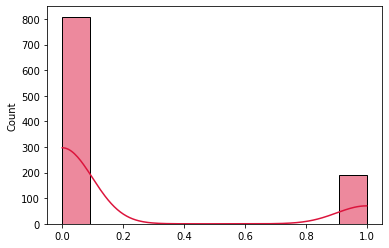

In [23]:
sns.histplot(bernoulli.rvs(size=1000,p=0.2),kde=True,color='crimson',label='p=0.2')

<AxesSubplot:ylabel='Count'>

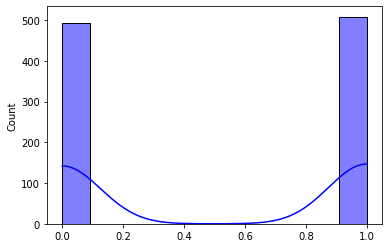

In [26]:
sns.histplot(bernoulli.rvs(size=1000,p=0.5),kde=True,color='blue',label='p=0.5')

<AxesSubplot:ylabel='Count'>

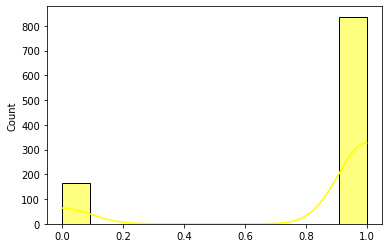

In [27]:
sns.histplot(bernoulli.rvs(size=1000,p=0.8),kde=True,color='yellow',label='p=0.8')

### 1.2 Binomial Distribution

### 1.2  Student-t Distribution

#### The t-distribution is symmetric and bell-shaped, like the normal distribution. However, the t-distribution has heavier tails, meaning that it is more prone to producing values that fall far from its mean.

#### In probability and statistics, Student's t-distribution (or simply the t-distribution) are useful to provide an estimation of the mean of a normally distributed population in situations where the sample size is small and the population's standard deviation is unknown. 


#### The t-distribution plays a role in a number of widely used statistical analyses, including Student's t-test for assessing the statistical significance of the difference between two sample means, the construction of confidence intervals for the difference between two population means, and in linear regression analysis.

#### Refer to the following figure.

#### As the degrees of freedom gets large, the t distribution approaches the standard normal distribution.



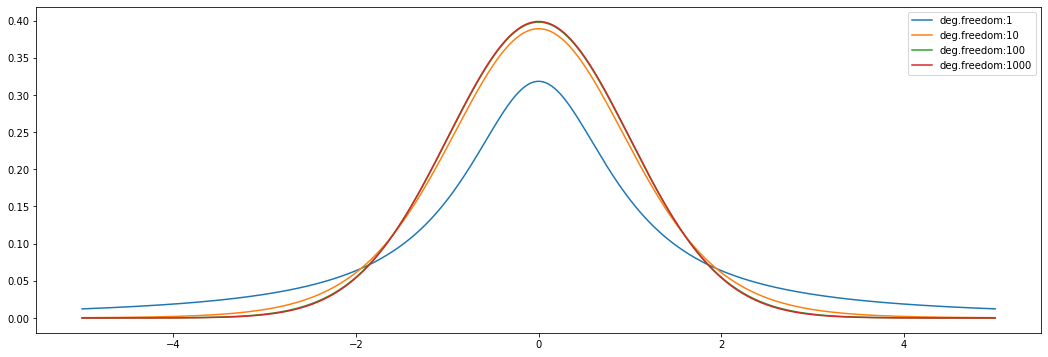

In [4]:
#x-axis ranges from -5 and 5 
x = np.linspace(-5, 5, 1000)

#define multiple normal distributions
fig, ax= plt.subplots(figsize=(18, 6))
plt.plot(x, sp.stats.t.pdf(x, 1), label='deg.freedom:1')
plt.plot(x, sp.stats.t.pdf(x, 10), label='deg.freedom:10')
plt.plot(x, sp.stats.t.pdf(x, 100), label='deg.freedom:100')
plt.plot(x, sp.stats.t.pdf(x, 1000), label='deg.freedom:1000')

#add legend to plot
plt.legend()

### 1.3  Uniform Distribution

#### The uniform distribution describes an experiment where there is an arbitrary outcome that lies between certain bounds. The bounds are defined by the parameters, a and b, which are the minimum and maximum values

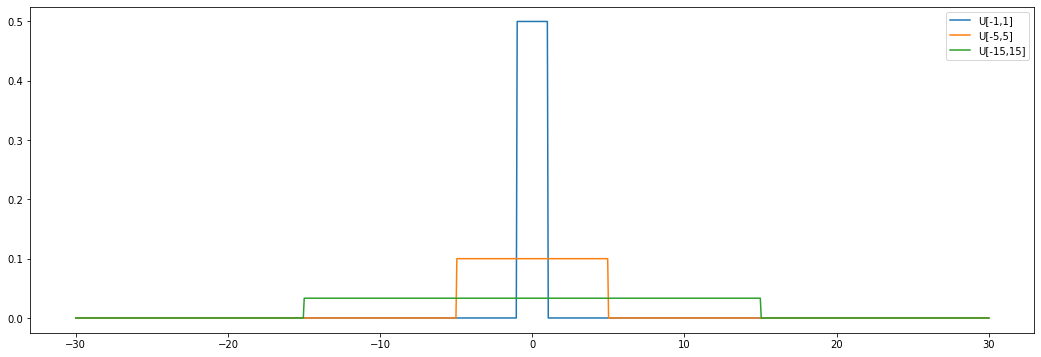

In [5]:

x = np.linspace(-30, 30, 1000)

#define multiple normal distributions
fig, ax= plt.subplots(figsize=(18, 6))
plt.plot(x, sp.stats.uniform.pdf(x,-1,2), label='U[-1,1]')
plt.plot(x, sp.stats.uniform.pdf(x,-5,10), label='U[-5,5]')
plt.plot(x, sp.stats.uniform.pdf(x,-15,30), label='U[-15,15]')

#add legend to plot
plt.legend()

### 1.4  Exponential Distribution

#### The exponential distribution is useful to determine the amount of time until some specific event occurs. For example, the amount of time (beginning now) until an earthquake occurs has an exponential distribution. Other examples include the length, in minutes, of long distance business telephone calls, and the amount of time, in months, a car battery lasts.


#### In probability theory and statistics, the exponential distribution is the probability distribution of the time between events in a Poisson point process, i.e., a process in which events occur continuously and independently at a constant average rate

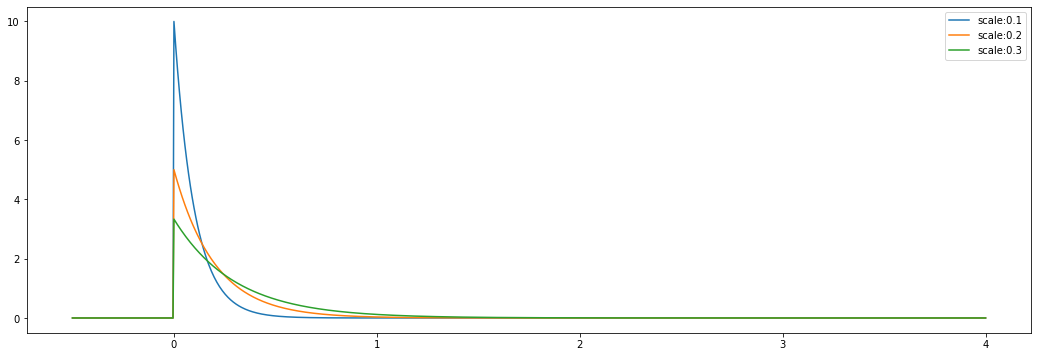

In [6]:

x = np.linspace(-0.5, 4, 1000)

#define multiple normal distributions
fig, ax= plt.subplots(figsize=(18, 6))
plt.plot(x, sp.stats.expon.pdf(x,0,0.1), label='scale:0.1')
plt.plot(x, sp.stats.expon.pdf(x,0,0.2), label='scale:0.2')
plt.plot(x, sp.stats.expon.pdf(x,0,0.3), label='scale:0.3')


#add legend to plot
plt.legend()

## 2. Analysis of continuous variables
### Context of the happiness dataset

In [7]:
happinessDataFrame = pd.read_csv('../data/world-happiness-report.csv',parse_dates=['year'])

In [8]:
happinessDataFrame.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008-01-01,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009-01-01,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010-01-01,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011-01-01,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012-01-01,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [9]:
happinessDataFrame.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [10]:
happinessDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Country name                      1949 non-null   object        
 1   year                              1949 non-null   datetime64[ns]
 2   Life Ladder                       1949 non-null   float64       
 3   Log GDP per capita                1913 non-null   float64       
 4   Social support                    1936 non-null   float64       
 5   Healthy life expectancy at birth  1894 non-null   float64       
 6   Freedom to make life choices      1917 non-null   float64       
 7   Generosity                        1860 non-null   float64       
 8   Perceptions of corruption         1839 non-null   float64       
 9   Positive affect                   1927 non-null   float64       
 10  Negative affect                   1933 non-null 

### We observe that the happiness dataset has 9 continuous variables, one time-related variable (year) and one categorical one (Country)

In [11]:
happinessDataFrame[[ 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']].head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [12]:
happinessDataFrame[[ 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']].describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [13]:
variablesToPlot=happinessDataFrame[[ 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']].columns

Life Ladder


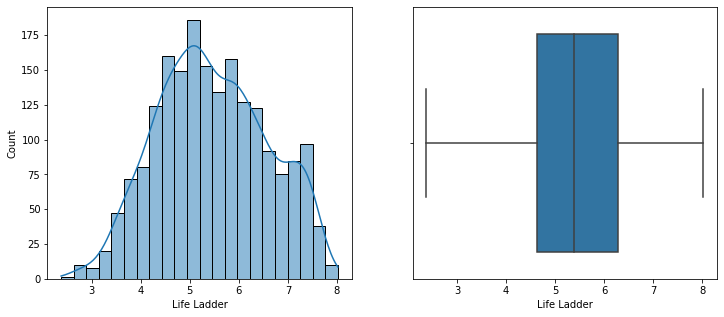

Log GDP per capita


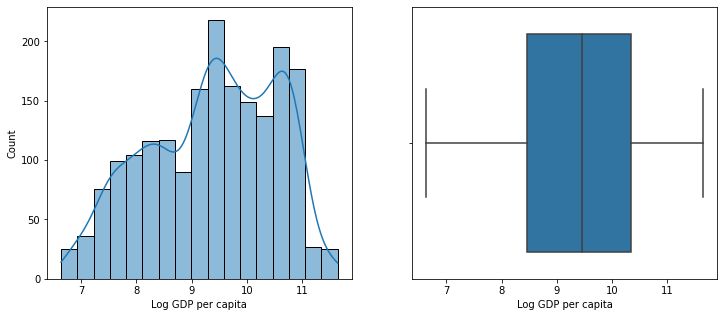

Social support


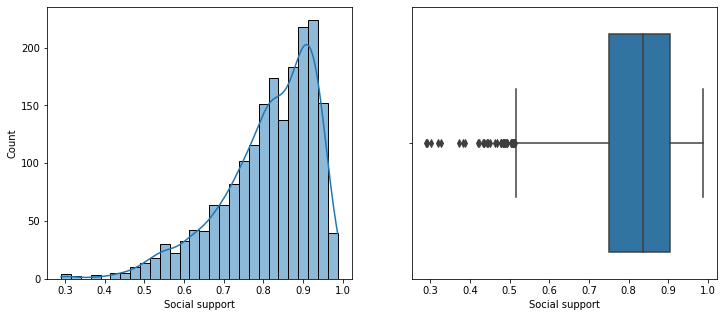

Healthy life expectancy at birth


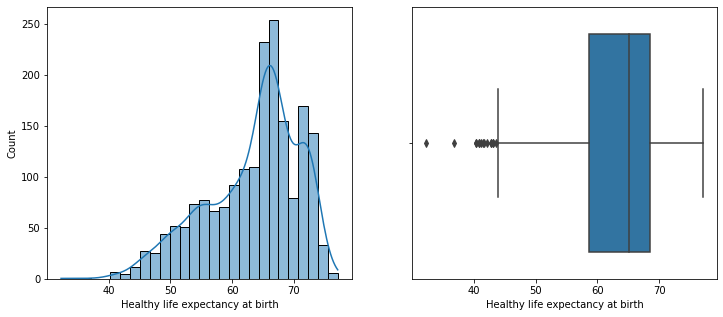

Freedom to make life choices


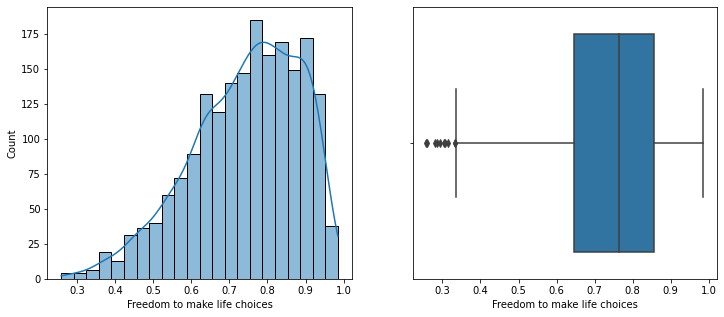

Generosity


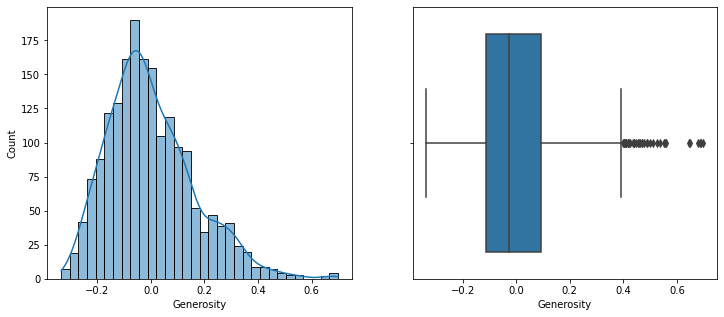

Perceptions of corruption


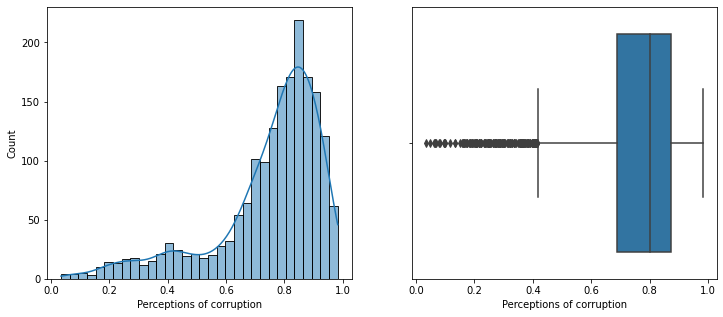

Positive affect


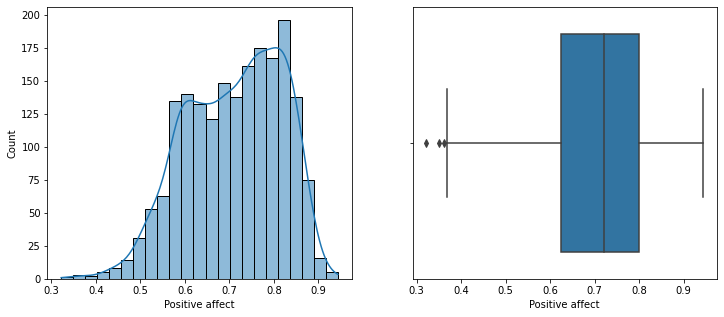

Negative affect


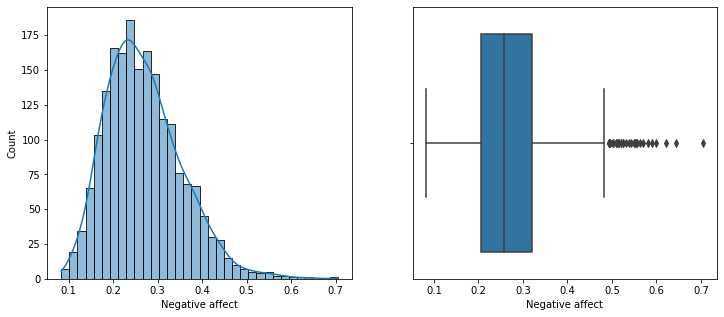

In [14]:
for item in variablesToPlot:
    print(item)
    f, axes = plt.subplots(1, 2,figsize=(12,5))
    sns.histplot(happinessDataFrame[item],kde=True,ax=axes[0]);
    
    sns.boxplot(x=happinessDataFrame[item],ax=axes[1]);
    plt.show()

### 2.1 Does life expectancy depend on where you live ?

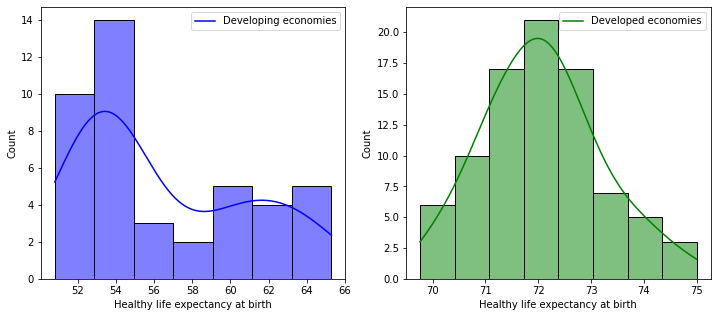

In [32]:
f, axes = plt.subplots(1, 2,figsize=(12,5))
sns.histplot(happinessDataFrame[happinessDataFrame['Country name'].isin(['Afghanistan','Yemen','Bangladesh','Angola'])]['Healthy life expectancy at birth'],kde=True,ax=axes[0],color='b');
sns.histplot(happinessDataFrame[happinessDataFrame['Country name'].isin(['France','Spain','Germany','Finland','Sweden','Portugal'])]['Healthy life expectancy at birth'],kde=True,ax=axes[1],color='g');
axes[0].legend( ['Developing economies'])
axes[1].legend( ['Developed economies'])

### 2.2 Does life expectancy depend on how much you earn ?

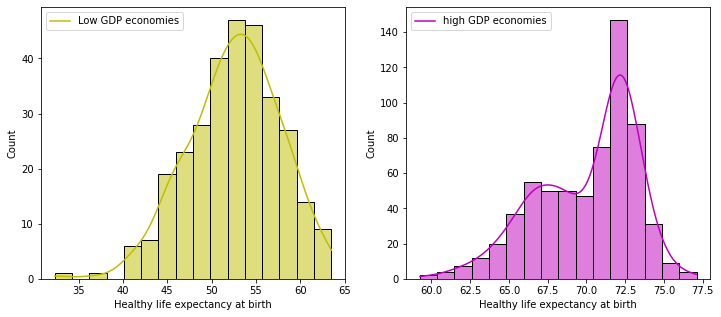

In [41]:
f, axes = plt.subplots(1, 2,figsize=(12,5))
sns.histplot(happinessDataFrame[happinessDataFrame['Log GDP per capita']<8]['Healthy life expectancy at birth'],kde=True,ax=axes[0],color='y');
sns.histplot(happinessDataFrame[happinessDataFrame['Log GDP per capita']>10]['Healthy life expectancy at birth'],kde=True,ax=axes[1],color='m');
axes[0].legend( ['Low GDP economies'])
axes[1].legend( ['high GDP economies'])

## In Lab 6 we will learn how to explore relationships between several variables